In [1]:
import sys
sys.path.append('/usr/local/lib/python3.6/site-packages/')
sys.path.append('../')

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import editdistance
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [3]:
import RNA
RAA="UGCA"

In [4]:
from evaluators.Evaluator import Evaluator

Using TensorFlow backend.


In [93]:
from explorers.elitist_explorers import Greedy
from explorers.evolutionary_explorers import WF, ML_WF

In [94]:
greedy_exp= Greedy(recomb_rate=0.1, threshold=0.05, mu=1, virtual_screen=20)
genetic_exp = WF(recomb_rate=0.1, mu=1) 

In [95]:
LANDSCAPE_TYPES ={"RNA": "all","TF":"all"} #This will take very long if not parallelized
LANDSCAPE_TYPES ={"RNA": [0],"TF": []} #for testing


In [96]:
evaluator=Evaluator(genetic_exp,landscape_types=LANDSCAPE_TYPES, path="../simulations/evaluations_test/")

loading landscapes RNA: [0], TF:[]
B1L14RNA1 loaded
0 TF landscapes loaded.
loading complete


In [97]:
#evaluator.evaluate_for_landscapes(evaluator.adaptivity, num_starts=1)

In [98]:
evaluator.evaluate_for_landscapes(evaluator.consistency_robustness_independence, num_starts=3)

Running on B1L14RNA1
start seq startRNAL14_0
round: 0, cost: 1, evals: 0, top: 0.5437468768175177
round: 1, cost: 39, evals: 38, top: 0.7222496462872485
round: 2, cost: 87, evals: 86, top: 0.7332344740044028
round: 3, cost: 113, evals: 112, top: 0.77442742080511
round: 4, cost: 163, evals: 162, top: 0.8101279537472399
round: 5, cost: 210, evals: 209, top: 0.8320975044224674
round: 6, cost: 255, evals: 254, top: 0.8815290196314998
round: 7, cost: 295, evals: 294, top: 0.8815290196314998
round: 8, cost: 321, evals: 320, top: 0.889767692798906
round: 9, cost: 357, evals: 356, top: 0.889767692798906
round: 0, cost: 1, evals: 0, top: 0.5437468768175177
round: 1, cost: 41, evals: 40, top: 0.7222496462872485
round: 2, cost: 81, evals: 80, top: 0.7634425930879556
round: 3, cost: 119, evals: 118, top: 0.7716812138758213
round: 4, cost: 157, evals: 156, top: 0.77442742080511
round: 5, cost: 193, evals: 192, top: 0.7799197822841466
round: 6, cost: 245, evals: 244, top: 0.889767692798906
round: 7,

In [72]:
data=pd.read_csv("../simulations/evaluations_test/consistency_robustness_independence/MLWFG_mu1_r0.1_rho1_beta100.csv",index_col=False)
data.head()

,id,batch,sequence,true_score,model_score,batch_size,measurement_cost,virtual_evals,landscape_id,start_id,model_type,virtual_screen,horizon,explorer_type
0,33d5ddb8-3e04-11ea-9dcd-f218984ddad3,1,AUGGGCCUUGCUCC,0.516285,3.539136,100,101,363,B1L14RNA1,startRNAL14_0,NAMb_ss0,20,10,MLWFG_mu1_r0.1_rho1_beta100
1,33d5ddb8-3e04-11ea-9dcd-f218984ddad3,1,AUGGGCCGGUCCUC,0.560224,2.262640,100,101,363,B1L14RNA1,startRNAL14_0,NAMb_ss0,20,10,MLWFG_mu1_r0.1_rho1_beta100
2,33d5ddb8-3e04-11ea-9dcd-f218984ddad3,1,AUGGGACGGCCCCC,0.524524,2.205084,100,101,363,B1L14RNA1,startRNAL14_0,NAMb_ss0,20,10,MLWFG_mu1_r0.1_rho1_beta100
3,33d5ddb8-3e04-11ea-9dcd-f218984ddad3,1,GAGGGCCGGACCCC,0.530016,2.081496,100,101,363,B1L14RNA1,startRNAL14_0,NAMb_ss0,20,10,MLWFG_mu1_r0.1_rho1_beta100
4,33d5ddb8-3e04-11ea-9dcd-f218984ddad3,1,AUGGGGCGGACCCA,0.527270,2.033181,100,101,363,B1L14RNA1,startRNAL14_0,NAMb_ss0,20,10,MLWFG_mu1_r0.1_rho1_beta100


In [28]:
data.id.unique()

array(['ac4181fa-3e02-11ea-b7f2-f218984ddad3',
       'd0f797f0-3e02-11ea-8608-f218984ddad3',
       'f0c07e1c-3e02-11ea-b6f0-f218984ddad3'], dtype=object)

In [29]:
data.landscape_id.unique()

array(['B1L14RNA1'], dtype=object)

In [77]:
sub_data=data[(data.model_type.str.startswith("Null"))&(data[" batch"]==1)].iloc[:100]

In [78]:
sub_data

,id,batch,sequence,true_score,model_score,batch_size,measurement_cost,virtual_evals,landscape_id,start_id,model_type,virtual_screen,horizon,explorer_type
11000,5cae1318-3e04-11ea-9a0c-f218984ddad3,1,CUGGCCCGGACUCC,0.524524,2.939744,100,101,343,B1L14RNA1,startRNAL14_0,Null,20,10,MLWFG_mu1_r0.1_rho1_beta100
11001,5cae1318-3e04-11ea-9a0c-f218984ddad3,1,UUGGGCCGGACCCC,0.519031,2.677424,100,101,343,B1L14RNA1,startRNAL14_0,Null,20,10,MLWFG_mu1_r0.1_rho1_beta100
11002,5cae1318-3e04-11ea-9a0c-f218984ddad3,1,AUGGGCCGGAUUCC,0.543747,2.642030,100,101,343,B1L14RNA1,startRNAL14_0,Null,20,10,MLWFG_mu1_r0.1_rho1_beta100
11003,5cae1318-3e04-11ea-9a0c-f218984ddad3,1,AUGGGCCGGAGCCC,0.672818,2.610595,100,101,343,B1L14RNA1,startRNAL14_0,Null,20,10,MLWFG_mu1_r0.1_rho1_beta100
11004,5cae1318-3e04-11ea-9a0c-f218984ddad3,1,UUGGGCCGGACCCG,0.538255,2.489499,100,101,343,B1L14RNA1,startRNAL14_0,Null,20,10,MLWFG_mu1_r0.1_rho1_beta100
11005,5cae1318-3e04-11ea-9a0c-f218984ddad3,1,AUGGCCCGCACCCA,0.472346,2.482584,100,101,343,B1L14RNA1,startRNAL14_0,Null,20,10,MLWFG_mu1_r0.1_rho1_beta100
11006,5cae1318-3e04-11ea-9a0c-f218984ddad3,1,UCGGGCCGGACCCC,0.527270,2.244198,100,101,343,B1L14RNA1,startRNAL14_0,Null,20,10,MLWFG_mu1_r0.1_rho1_beta100
11007,5cae1318-3e04-11ea-9a0c-f218984ddad3,1,AUAGGCCUGACCCC,0.381721,2.152138,100,101,343,B1L14RNA1,startRNAL14_0,Null,20,10,MLWFG_mu1_r0.1_rho1_beta100
11008,5cae1318-3e04-11ea-9a0c-f218984ddad3,1,AUGGUCCGGAACCC,0.477838,1.927041,100,101,343,B1L14RNA1,startRNAL14_0,Null,20,10,MLWFG_mu1_r0.1_rho1_beta100
11009,5cae1318-3e04-11ea-9a0c-f218984ddad3,1,AUGGGCCGGACGCC,0.606909,1.913046,100,101,343,B1L14RNA1,startRNAL14_0,Null,20,10,MLWFG_mu1_r0.1_rho1_beta100


In [79]:
sub_data[["true_score","model_score"]].corr("pearson")

,true_score,model_score
true_score,1.000000,0.080094
model_score,0.080094,1.000000


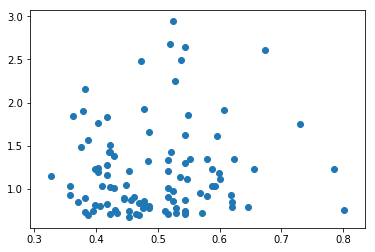

In [80]:
plt.scatter(sub_data["true_score"],sub_data["model_score"])

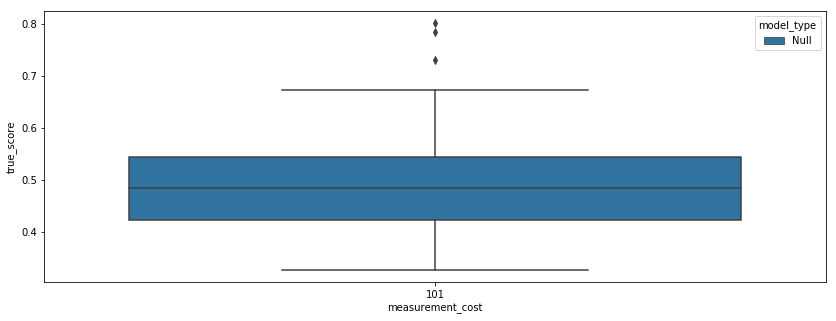

In [81]:
plt.figure(figsize=(14,5))
sns.boxplot(x="measurement_cost",y="true_score",hue="model_type",data=sub_data)

In [82]:
data["start_id"].unique()

array(['startRNAL14_0', 'startRNAL14_1', 'startRNAL14_2'], dtype=object)

In [83]:
import timeit

In [ ]:
def get_top_sequence_per_batch(data):
    top_per_batch=[]
    for i in data.batch.unique():
        sub_data=data[data.batch==i] #must also group by model type and landscape id
        #print (sub_data.true_score.max())
        top_per_batch.append(sub_data.true_score.max())
    return (top_per_batch)

200.0